##### 샘플 데이터

In [22]:
import pandas as pd
import numpy as np
import pickle
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [23]:
# 팀원들의 액터 파일 병합
team = ["강건","강윤서","송효진","권동현"]
dataframes = []
for i in team:
    with open("data/Cluster_{}_action.pkl".format(i), "rb") as f:
        temp = pickle.load(f)
    dataframes.append(temp)
df = pd.concat(dataframes, ignore_index=True)

In [24]:
df

,review,cluster,action_cluster
0,시작물론 지금은 월이지만 일 딜라이트서울 생일 기념 사실 과제 때문 백심이랑 전시...,0,2
1,기념일 여행 다녀왔당동대구로 사실 집 가는 느낌이라 감흥 없었는데누구보다 재밌게 ...,0,1
2,에서 알바할때가끔 갱얼쥐랑 오는사람있는데감사합니다요 지루한 알바중 반가운소식 갱얼쥐...,0,5
3,월요일 일 부처남 오신날도 못 쉬고 덕질하러 하이브 뮤지엄 다녀옴 일도 못 쉬고 역...,0,2
4,동국대학교서울캠퍼스이해랑예술극장 알앤제이 R J 조은솔 강영석 구준모 최호승 영석 ...,0,1
...,...,...,...
504,함께 즐겨요 숲속에서 즐기는 클래식 문화 공연 나들이 숲속에서 즐거운 클래식 공연이...,1,2
505,여름 축제 줄라이 페스티벌 의 포스터를 기쁜 마음으로 공개합니다 그동안 원먼스 페스...,1,1
506,호현 기자 안산시 상록구 본오 동 행정복지센터는 본오 동 주민자치위원회 위원장 임재...,1,1
507,조선팝 혹은 국악팝 에 대해 알고 계신가요 조선팝이란 국악에 가요 요소를 접목한요...,1,3


# ◆ 1. Satisfaction
* 1.1 감성사전 불러오기 (SentiWord_info.json)
* 1.2 감성점수 구하는 define 함수 만들기
* 1.3 감성점수 구하기
* 1.4 액션 별로 감성점수 계산해서 df에 추가하기

### 1.1 감성사전 불러오기

In [25]:
import json

In [26]:
with open('SentiWord_info.json', encoding='utf-8-sig', mode='r') as f:
    senti_dict = json.load(f)
senti_dict

[{'word': '(-;', 'word_root': '(', 'polarity': '1'},
 {'word': '(;_;)', 'word_root': '(;_;)', 'polarity': '-1'},
 {'word': '(^^)', 'word_root': '(^^)', 'polarity': '1'},
 {'word': '(^-^)', 'word_root': '(^-^)', 'polarity': '1'},
 {'word': '(^^*', 'word_root': '(', 'polarity': '1'},
 {'word': '(^_^)', 'word_root': '(^_^)', 'polarity': '1'},
 {'word': '(^_^;', 'word_root': '(', 'polarity': '-1'},
 {'word': '(^o^)', 'word_root': '(^o^)', 'polarity': '1'},
 {'word': '(-_-)', 'word_root': '(-_-)', 'polarity': '-1'},
 {'word': '(T_T)', 'word_root': '(T_T)', 'polarity': '-1'},
 {'word': '(ㅡㅡ)', 'word_root': '(', 'polarity': '-1'},
 {'word': ')-:', 'word_root': ')', 'polarity': '-1'},
 {'word': '*^^*', 'word_root': '*', 'polarity': '1'},
 {'word': '/^o^\\', 'word_root': '/', 'polarity': '1'},
 {'word': ':(', 'word_root': ':', 'polarity': '1'},
 {'word': ":'-(", 'word_root': ':', 'polarity': '1'},
 {'word': ':-(', 'word_root': ':', 'polarity': '1'},
 {'word': ':)', 'word_root': ':', 'polarity':

### 1.2 감성점수 구하는 define 함수 만들기

In [27]:
#감성 점수 구하는 define 함수만들기
def sentiment_score(sent_dicts, token_list):
    result_list=[]
    for token in token_list:
        for dict in sent_dicts:
            if token == dict['word']:
                result = dict['polarity'], dict['word']
                result_list.append(result)
    return result_list 

### 1.3  감성점수 구하기

In [28]:
sentiment_score(senti_dict, ["경솔하게","발언","했다"])

[('-1', '경솔하게')]

#### 1.3.1 적합하게 형태소 재분리

In [29]:
from konlpy.tag import Okt
okt=Okt()

In [33]:
#원하는 태그 추출
#불용어 사전 X
#VerbPrefix 추가

def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem=True, norm=True)

    tagged_list=[]
    for word, tag in pos_words:
        if tag in ['Noun', 'Adjective','Verb', 'VerbPrefix']:
            tagged_list.append(word)
    return tagged_list

In [35]:
sentiment=[]
for i in tqdm(df['review']):
    token = okt_pos_tagging(i)
    score = sentiment_score(senti_dict, token)
    sentiment.append(score)
sentiment

100%|██████████| 509/509 [02:08<00:00,  3.95it/s]


[[('2', '만족'),
  ('2', '야무지다'),
  ('1', '연애'),
  ('1', '운'),
  ('-2', '벌'),
  ('1', '크다'),
  ('2', '맛있다'),
  ('2', '최고'),
  ('-2', '최악'),
  ('-2', '느끼하다'),
  ('-1', '쑤시다'),
  ('1', '도리'),
  ('1', '받다'),
  ('2', '성공'),
  ('2', '고맙다'),
  ('2', '감사하다'),
  ('2', '좋다'),
  ('-1', '떨다'),
  ('-1', '포기'),
  ('-1', '포기'),
  ('0', '앙큼하다'),
  ('2', '맛있다'),
  ('1', '받다'),
  ('2', '성공하다'),
  ('-1', '충격'),
  ('-2', '해치다'),
  ('1', '받다'),
  ('2', '귀엽다'),
  ('-2', '고난'),
  ('-1', '역경'),
  ('0', '못'),
  ('-2', '망하다'),
  ('-1', '맛없다'),
  ('2', '돕다'),
  ('2', '행복하다'),
  ('2', '감사'),
  ('2', '감사'),
  ('1', '다양하다'),
  ('2', '감사'),
  ('2', '감사'),
  ('1', '놀다'),
  ('2', '감사'),
  ('2', '감사'),
  ('2', '감사'),
  ('2', '감사'),
  ('1', '극락'),
  ('1', '끌다'),
  ('2', '이쁘다'),
  ('1', '받다'),
  ('2', '좋아하다'),
  ('-1', '없다'),
  ('-2', '죄송하다'),
  ('2', '많다'),
  ('-1', '감기'),
  ('-1', '조심하다'),
  ('2', '좋다'),
  ('2', '감사하다')],
 [('-1', '없다'),
  ('1', '놀다'),
  ('2', '완벽하다'),
  ('-1', '겁나다'),
  ('-1', '짐'),
  ('2', '많다'),
  ('

#### 1.3.2 감정점수 적용하기

In [37]:
#감성점수 평균구하기
sentiment_score = []
for sent in tqdm(sentiment):
    score = []
    for s in sent:
        score.append(int(s[0]))

    #감성 점수가 잡히지 않은 리스트는 len이 0
    if len(score) == 0:
        sentiment_score.append(0)
    else:
        sentiment_score.append(np.mean(score))
sentiment_score

100%|██████████| 509/509 [00:00<00:00, 42416.37it/s]


[0.7017543859649122,
 0.7241379310344828,
 0.3076923076923077,
 -0.15555555555555556,
 0.04878048780487805,
 0.1568627450980392,
 0.36231884057971014,
 0.3055555555555556,
 0.22950819672131148,
 0.36,
 -0.24193548387096775,
 0.14285714285714285,
 0.5510204081632653,
 0.21052631578947367,
 0.4090909090909091,
 -0.2727272727272727,
 0.2545454545454545,
 0.6590909090909091,
 0.8333333333333334,
 0.14,
 0.5,
 0.5333333333333333,
 0.1746031746031746,
 0.3484848484848485,
 0.0,
 0.4722222222222222,
 -0.7457627118644068,
 0.15384615384615385,
 0.22641509433962265,
 0.10256410256410256,
 0.4838709677419355,
 0.9767441860465116,
 0.9333333333333333,
 1.032258064516129,
 0.3389830508474576,
 0.9066666666666666,
 -0.0625,
 0.53125,
 0.29411764705882354,
 0.32653061224489793,
 1.131578947368421,
 1.16,
 0.9,
 1.0588235294117647,
 0.8478260869565217,
 1.0,
 0.0,
 1.1875,
 0.2571428571428571,
 -0.3870967741935484,
 1.1111111111111112,
 0.717948717948718,
 0.8524590163934426,
 0.8863636363636364,
 1.

In [38]:
df['sentiment_score'] = sentiment_score

### 1.4 전체 액터와 액션에 대해서 감성점수 계산


#### 1.4.1 dict 형식으로 출력


In [39]:
# actor 확인
df.action_cluster.unique()

array([2, 1, 5, 3, 4, 6], dtype=int64)

In [40]:
action_sents=dict()
for actor in df.cluster.unique():
    actor_df = df[df['cluster']==actor]

    for i in actor_df.action_cluster.unique():
        action_score = actor_df[actor_df['action_cluster']==i].sentiment_score
        action_score = np.mean(action_score)
        action_sents['Actor{}_Action{}'.format(actor, i)] = action_score

In [41]:
action_sents

{'Actor0_Action2': 0.5356844435693264,
 'Actor0_Action1': 0.42773788209728064,
 'Actor0_Action5': 0.5583945736622896,
 'Actor0_Action3': 0.5866450898478548,
 'Actor0_Action4': 0.6426870456216451,
 'Actor4_Action4': 0.570306749428705,
 'Actor4_Action1': 0.8872326811861696,
 'Actor4_Action3': 0.5468411082381671,
 'Actor4_Action5': 0.666874225785295,
 'Actor4_Action2': 0.4137303197140925,
 'Actor3_Action5': 0.51661332816795,
 'Actor3_Action2': 0.463652751852095,
 'Actor3_Action1': 0.32925615155236143,
 'Actor3_Action3': 0.5346141732035288,
 'Actor3_Action4': 0.4302407366559114,
 'Actor1_Action2': 0.7151326388389956,
 'Actor1_Action3': 0.8220074069851955,
 'Actor1_Action1': 0.5508482342917944,
 'Actor1_Action5': 0.8448748564540864,
 'Actor1_Action4': 0.6860544753519405,
 'Actor1_Action6': 0.6687535453052694}

#### 1.4.2 정규화 (0~10)
* minmaxscaler를 이용해서 정규화 : 주어진 데이터를 특정 범위로 변환(정규화)하는 데 사용
* minmaxscaler은 배열(array 데이터 형식, shape이 1이어야 작동)로 변환필요 

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
#정규화할 데이터 값가져오기
data = action_sents.values()

#array로 변환
#-1은 크기가 1인 차원으로 계산하고 나머지는 데이터의 크기에 따라 적절히 자동으로 들어감
data = np.array(list(data)).reshape(-1,1)
data

array([[0.53568444],
       [0.42773788],
       [0.55839457],
       [0.58664509],
       [0.64268705],
       [0.57030675],
       [0.88723268],
       [0.54684111],
       [0.66687423],
       [0.41373032],
       [0.51661333],
       [0.46365275],
       [0.32925615],
       [0.53461417],
       [0.43024074],
       [0.71513264],
       [0.82200741],
       [0.55084823],
       [0.84487486],
       [0.68605448],
       [0.66875355]])

In [43]:
#스케일러 생성
scaler = MinMaxScaler(feature_range=(-10, 10))
transformed_data = scaler.fit_transform(data)
transformed_data

array([[ -2.60082527],
       [ -6.47004039],
       [ -1.78680787],
       [ -0.77420197],
       [  1.23455477],
       [ -1.35983021],
       [ 10.        ],
       [ -2.20092799],
       [  2.10151525],
       [ -6.97212468],
       [ -3.28440654],
       [ -5.18271493],
       [-10.        ],
       [ -2.63918782],
       [ -6.38032857],
       [  3.83128023],
       [  7.66207822],
       [ -2.05729736],
       [  8.48173454],
       [  2.78900831],
       [  2.16887721]])

In [46]:
#df 생성
sents_df = pd.DataFrame(action_sents.keys(), columns=['Action'])
sents_df['satisfaction'] = transformed_data
sents_df

,Action,satisfaction
0,Actor0_Action2,-2.600825
1,Actor0_Action1,-6.470040
2,Actor0_Action5,-1.786808
3,Actor0_Action3,-0.774202
4,Actor0_Action4,1.234555
5,Actor4_Action4,-1.359830
6,Actor4_Action1,10.000000
7,Actor4_Action3,-2.200928
8,Actor4_Action5,2.101515
9,Actor4_Action2,-6.972125


# ◆ 2. Importance
* 2.1 importance 점수 구하기 _ 전체 토픽의 비중
* 2.2 importance 점수 정규화

### 2-1. Importance 점수 구하기

In [31]:
from collections import Counter

In [48]:
importance_check = []
for actor, action in zip(df['cluster'], df['action_cluster']):
    importance_check.append('Actor'+str(actor)+ '_'+'Action'+str(action))
importance_check

['Actor0_Action2',
 'Actor0_Action1',
 'Actor0_Action5',
 'Actor0_Action2',
 'Actor0_Action1',
 'Actor0_Action1',
 'Actor0_Action2',
 'Actor0_Action3',
 'Actor0_Action2',
 'Actor0_Action1',
 'Actor0_Action3',
 'Actor0_Action2',
 'Actor0_Action1',
 'Actor0_Action1',
 'Actor0_Action1',
 'Actor0_Action1',
 'Actor0_Action2',
 'Actor0_Action2',
 'Actor0_Action3',
 'Actor0_Action1',
 'Actor0_Action2',
 'Actor0_Action1',
 'Actor0_Action1',
 'Actor0_Action2',
 'Actor0_Action3',
 'Actor0_Action1',
 'Actor0_Action1',
 'Actor0_Action1',
 'Actor0_Action2',
 'Actor0_Action1',
 'Actor0_Action3',
 'Actor0_Action2',
 'Actor0_Action5',
 'Actor0_Action5',
 'Actor0_Action2',
 'Actor0_Action3',
 'Actor0_Action4',
 'Actor0_Action2',
 'Actor0_Action1',
 'Actor0_Action3',
 'Actor0_Action5',
 'Actor0_Action2',
 'Actor0_Action3',
 'Actor0_Action4',
 'Actor0_Action2',
 'Actor0_Action4',
 'Actor0_Action4',
 'Actor0_Action4',
 'Actor0_Action5',
 'Actor0_Action5',
 'Actor0_Action4',
 'Actor0_Action1',
 'Actor0_Act

In [49]:
freq = Counter(importance_check)
freq

Counter({'Actor1_Action1': 51,
         'Actor3_Action1': 40,
         'Actor1_Action2': 40,
         'Actor1_Action3': 38,
         'Actor0_Action1': 37,
         'Actor1_Action4': 35,
         'Actor3_Action3': 28,
         'Actor3_Action4': 27,
         'Actor1_Action5': 27,
         'Actor0_Action2': 25,
         'Actor3_Action2': 24,
         'Actor3_Action5': 21,
         'Actor0_Action3': 18,
         'Actor0_Action4': 18,
         'Actor4_Action5': 18,
         'Actor0_Action5': 17,
         'Actor4_Action4': 12,
         'Actor4_Action3': 10,
         'Actor1_Action6': 10,
         'Actor4_Action2': 7,
         'Actor4_Action1': 6})

In [50]:
# 중요도 계산
# 각 토픽(action)별 양 / 전체 말뭉치 양
importance_dict = dict()

total_count = len(importance_check)
for item, value in freq.items():
    importance = (value/total_count)*100
    importance_dict[item] = importance
importance_dict

{'Actor0_Action2': 4.911591355599214,
 'Actor0_Action1': 7.269155206286837,
 'Actor0_Action5': 3.3398821218074657,
 'Actor0_Action3': 3.536345776031434,
 'Actor0_Action4': 3.536345776031434,
 'Actor4_Action4': 2.357563850687623,
 'Actor4_Action1': 1.1787819253438114,
 'Actor4_Action3': 1.9646365422396856,
 'Actor4_Action5': 3.536345776031434,
 'Actor4_Action2': 1.37524557956778,
 'Actor3_Action5': 4.12573673870334,
 'Actor3_Action2': 4.715127701375246,
 'Actor3_Action1': 7.858546168958743,
 'Actor3_Action3': 5.50098231827112,
 'Actor3_Action4': 5.304518664047151,
 'Actor1_Action2': 7.858546168958743,
 'Actor1_Action3': 7.465618860510806,
 'Actor1_Action1': 10.019646365422396,
 'Actor1_Action5': 5.304518664047151,
 'Actor1_Action4': 6.8762278978389,
 'Actor1_Action6': 1.9646365422396856}

### 2-2. Importance 점수 정규화(0~10)

In [51]:
#정규화할 데이터 값가져오기
data = importance_dict.values()

#array로 변환
#-1은 크기가 1인 차원으로 계산하고 나머지는 데이터의 크기에 따라 적절히 자동으로 들어감
data = np.array(list(data)).reshape(-1,1)
data

array([[ 4.91159136],
       [ 7.26915521],
       [ 3.33988212],
       [ 3.53634578],
       [ 3.53634578],
       [ 2.35756385],
       [ 1.17878193],
       [ 1.96463654],
       [ 3.53634578],
       [ 1.37524558],
       [ 4.12573674],
       [ 4.7151277 ],
       [ 7.85854617],
       [ 5.50098232],
       [ 5.30451866],
       [ 7.85854617],
       [ 7.46561886],
       [10.01964637],
       [ 5.30451866],
       [ 6.8762279 ],
       [ 1.96463654]])

In [52]:
#스케일러 생성
scaler = MinMaxScaler(feature_range=(0, 10))
transformed_data = scaler.fit_transform(data)
transformed_data

array([[ 4.22222222],
       [ 6.88888889],
       [ 2.44444444],
       [ 2.66666667],
       [ 2.66666667],
       [ 1.33333333],
       [ 0.        ],
       [ 0.88888889],
       [ 2.66666667],
       [ 0.22222222],
       [ 3.33333333],
       [ 4.        ],
       [ 7.55555556],
       [ 4.88888889],
       [ 4.66666667],
       [ 7.55555556],
       [ 7.11111111],
       [10.        ],
       [ 4.66666667],
       [ 6.44444444],
       [ 0.88888889]])

In [53]:
sents_df['importance'] = transformed_data
sents_df

,Action,satisfaction,importance
0,Actor0_Action2,-2.600825,4.222222
1,Actor0_Action1,-6.470040,6.888889
2,Actor0_Action5,-1.786808,2.444444
3,Actor0_Action3,-0.774202,2.666667
4,Actor0_Action4,1.234555,2.666667
5,Actor4_Action4,-1.359830,1.333333
6,Actor4_Action1,10.000000,0.000000
7,Actor4_Action3,-2.200928,0.888889
8,Actor4_Action5,2.101515,2.666667
9,Actor4_Action2,-6.972125,0.222222


# ◆ 3. Opportunity
* 3.1 Opportunity score
* 3.2 Opportunity area

### 3.1 Opportunity score
Opportunity = Importance + Max(Importance-Satisfaction, 0)

In [54]:
def Opportunity_score(satisfaction, importance):
    return importance+max(0,satisfaction-importance)

In [55]:
# 기회 영역 점수를 담을 리스트 생성
opportunity_list = []
for s, i in zip(sents_df['satisfaction'], sents_df['importance']):
    score_result = Opportunity_score(s, i)
    opportunity_list.append(score_result)

In [66]:
# 새로운 열 추가
sents_df['opportunity'] = opportunity_list
sents_df.to_csv('data/opportunity_score_df.csv',index=False)
sents_df

,Action,satisfaction,importance,opportunity
0,Actor0_Action2,-2.600825,4.222222,4.222222
1,Actor0_Action1,-6.470040,6.888889,6.888889
2,Actor0_Action5,-1.786808,2.444444,2.444444
3,Actor0_Action3,-0.774202,2.666667,2.666667
4,Actor0_Action4,1.234555,2.666667,2.666667
5,Actor4_Action4,-1.359830,1.333333,1.333333
6,Actor4_Action1,10.000000,0.000000,10.000000
7,Actor4_Action3,-2.200928,0.888889,0.888889
8,Actor4_Action5,2.101515,2.666667,2.666667
9,Actor4_Action2,-6.972125,0.222222,0.222222


### 3.2 Opportunity area

In [58]:
import matplotlib.pyplot as plt

In [59]:
colors = np.random.rand(len(sents_df.Action), 3)
satisfaction = sents_df.satisfaction
importance = sents_df.importance
actions = sents_df.Action

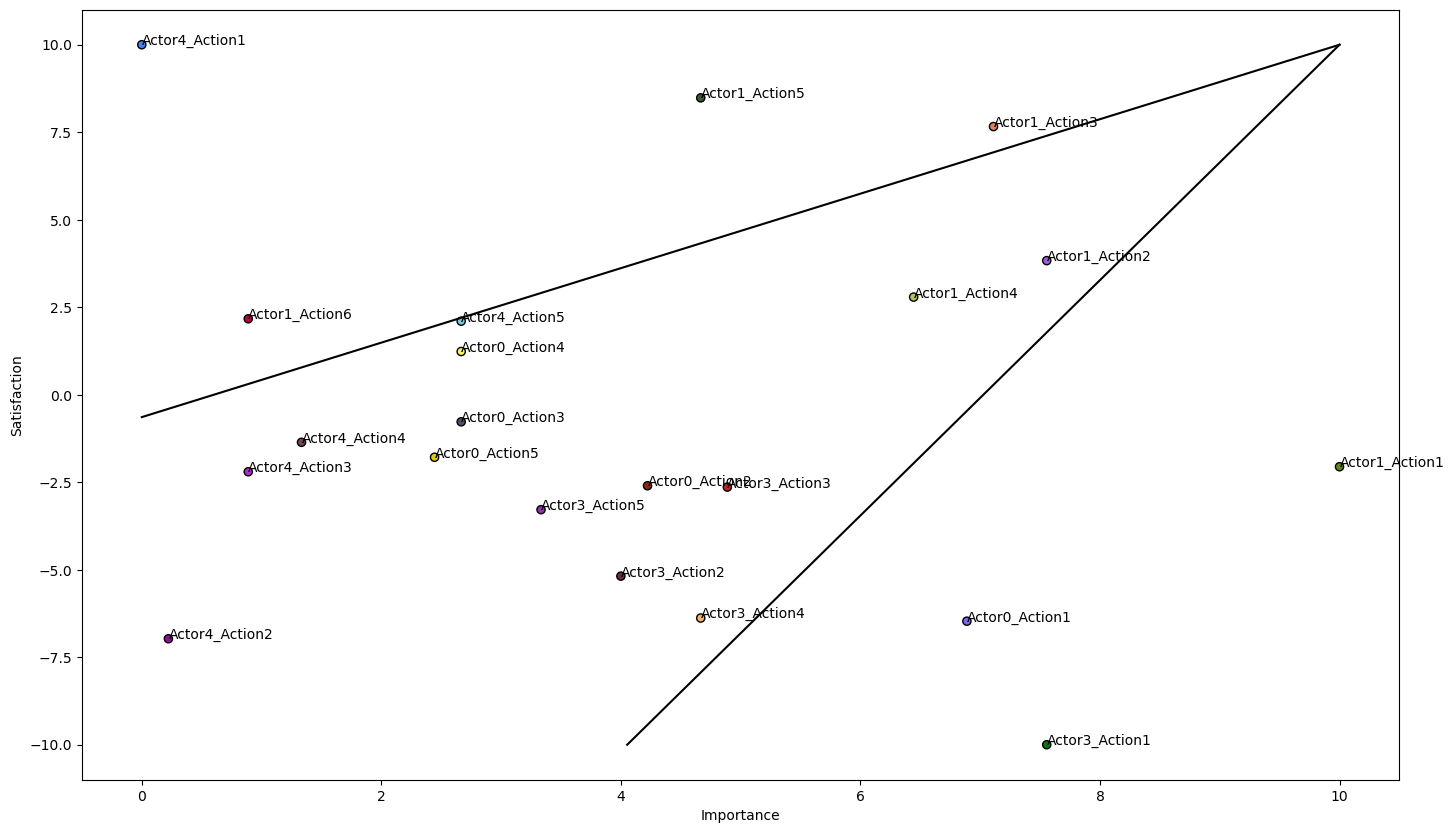

In [65]:
plt.figure(figsize=(17, 10))
plt.scatter(importance, satisfaction,  s=35, c=colors, edgecolors='black') #s는 점의 사이

#만족도 기준선
xdata = [0, 10]
ydata = [satisfaction.mean(), 10]
plt.plot(xdata, ydata, 'k')

plt.xlabel('Importance')
plt.ylabel('Satisfaction')

#중요도 기준선
x_data = [importance.mean(), 10]
y_data = [-10, 10]
plt.plot(x_data, y_data, 'k')

# 각 포인트에 레이블 추가
for i, action in enumerate(actions):
    plt.text(importance[i], satisfaction[i], action, fontsize=10)
    
# 그림 저장
plt.savefig('data/opportunity_area.png')

In [70]:
df_combined = df[(df['action_cluster'] == 1) & (df['cluster'].isin([0, 1, 3]))]
df_combined.to_csv('data/result.csv',index=False)